In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# 데이터 로드

In [50]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/dacon_seoul/data/train.csv')

In [51]:
train_df

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6
...,...,...,...,...,...,...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,10.6,NaN,69.8,1.8,8.8,10.25,91.7,-2.6
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8


데이터 정보 확인

In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      23011 non-null  object 
 1   최고기온    23008 non-null  float64
 2   최저기온    23008 non-null  float64
 3   일교차     23007 non-null  float64
 4   강수량     9150 non-null   float64
 5   평균습도    23011 non-null  float64
 6   평균풍속    23007 non-null  float64
 7   일조합     22893 non-null  float64
 8   일사합     18149 non-null  float64
 9   일조율     22645 non-null  float64
 10  평균기온    23011 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB


기술 통계 확인

In [53]:
train_df.describe()

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
count,23008.000000,23008.000000,23007.000000,9150.000000,23011.000000,23007.000000,22893.000000,18149.000000,22645.000000,23011.000000
mean,17.071714,8.451960,8.619277,9.593683,65.202851,2.380993,5.858826,11.933170,48.653526,12.415419
std,10.714471,10.578285,2.907096,21.966135,14.549077,0.947595,3.816941,6.419122,31.662321,10.489515
min,-13.600000,-20.200000,1.000000,0.000000,17.900000,0.100000,0.000000,0.000000,0.000000,-16.400000
25%,7.800000,-0.300000,6.600000,0.100000,54.900000,1.700000,2.200000,7.000000,17.800000,3.400000
50%,18.900000,9.200000,8.600000,1.400000,65.500000,2.200000,6.600000,11.220000,55.700000,13.800000
75%,26.400000,17.900000,10.600000,8.500000,75.800000,2.900000,9.000000,16.620000,78.000000,21.800000
max,39.600000,30.300000,19.600000,332.800000,99.800000,7.800000,13.700000,33.480000,96.900000,33.700000


결측치 확인

In [54]:
train_df.isnull()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,False,False,False,False,True,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,True,True,False
4,False,False,False,False,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
23006,False,False,False,False,True,False,False,False,False,False,False
23007,False,False,False,False,False,False,False,False,False,False,False
23008,False,False,False,False,False,False,False,False,False,False,False
23009,False,False,False,False,False,False,False,False,False,False,False


In [55]:
train_df.isnull().sum()

일시          0
최고기온        3
최저기온        3
일교차         4
강수량     13861
평균습도        0
평균풍속        4
일조합       118
일사합      4862
일조율       366
평균기온        0
dtype: int64

시계열 데이터이기 때문에 결측치를 뒤의 값으로 대체하여 처리하였음.

첫 행에 결측치인 컬럼이 존재하기 때문에 뒤의 값으로 설정.

모델성능평가 시에 성능이 좋지 않다면, 결측치를 제거하는 방향으로 재시도 예정.

In [56]:
train_df['최고기온'].fillna(method='bfill', inplace=True)  # 뒤의 값으로 대체
train_df['최저기온'].fillna(method='bfill', inplace=True)
train_df['일교차'].fillna(method='bfill', inplace=True)
train_df['강수량'].fillna(method='bfill', inplace=True)
train_df['평균풍속'].fillna(method='bfill', inplace=True)
train_df['일조합'].fillna(method='bfill', inplace=True)
train_df['일사합'].fillna(method='bfill', inplace=True)
train_df['일조율'].fillna(method='bfill', inplace=True)

In [57]:
train_df.isnull().sum()

일시      0
최고기온    0
최저기온    0
일교차     0
강수량     0
평균습도    0
평균풍속    0
일조합     0
일사합     0
일조율     0
평균기온    0
dtype: int64

In [58]:
train_df['강수량'].fillna(method='ffill', inplace=True)
train_df['일사합'].fillna(method='ffill', inplace=True)
train_df['일조율'].fillna(method='ffill', inplace=True)

In [59]:
train_df

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,0.4,68.3,1.7,6.7,4.81,28.1,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,4.81,28.1,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,4.81,28.1,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,4.81,28.1,7.5
4,1960-01-05,1.3,-8.2,9.5,0.0,44.0,5.1,8.2,4.81,28.1,-4.6
...,...,...,...,...,...,...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,10.6,0.1,69.8,1.8,8.8,10.25,91.7,-2.6
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [62]:
!pip install matplotlib

In [63]:
# 상관 행렬 계산
correlation_matrix = train_df.corr()

<ipython-input-63-25db3a623122>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


# 히트맵

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


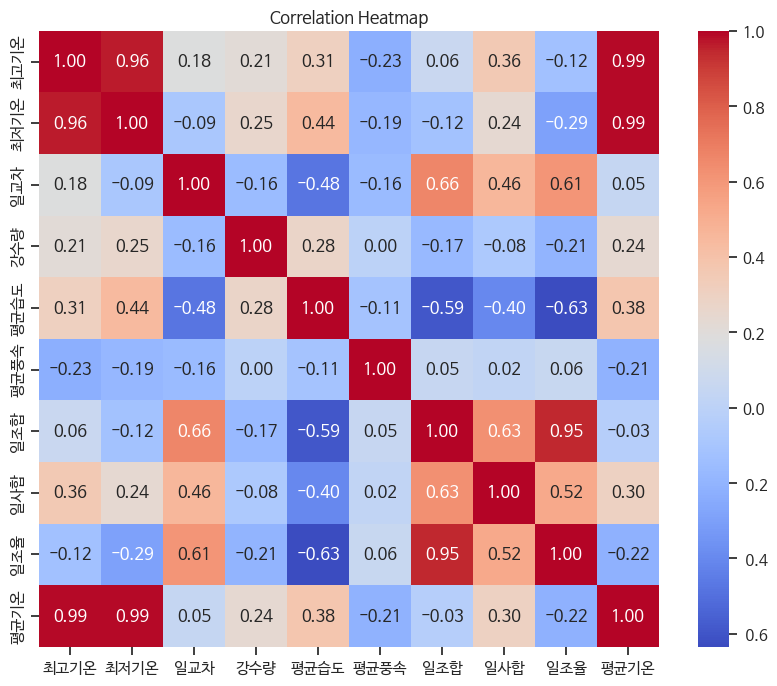

In [64]:
plt.rc('font', family='NanumBarunGothic')
# 히트맵으로 상관 관계 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 산점도

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


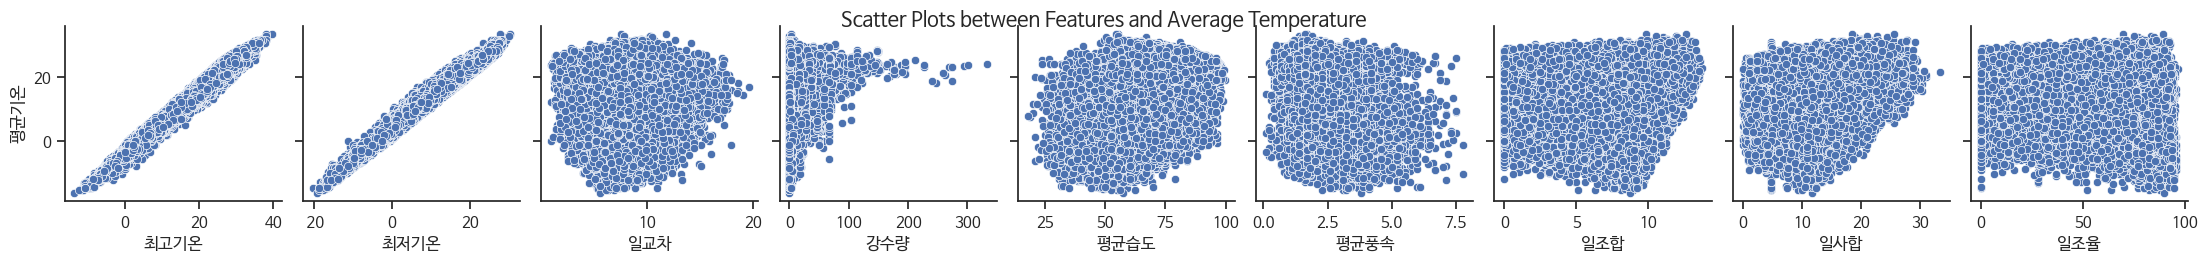

In [65]:
plt.rc('font', family='NanumBarunGothic')
# 설명변수와 예측변수 간의 산점도 행렬
sns.pairplot(train_df, x_vars=['최고기온', '최저기온', '일교차', '강수량', '평균습도', '평균풍속', '일조합', '일사합', '일조율'], y_vars=['평균기온'])
plt.suptitle('Scatter Plots between Features and Average Temperature', y=1.02)
plt.show()


# 일시에 따른 평균기온

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


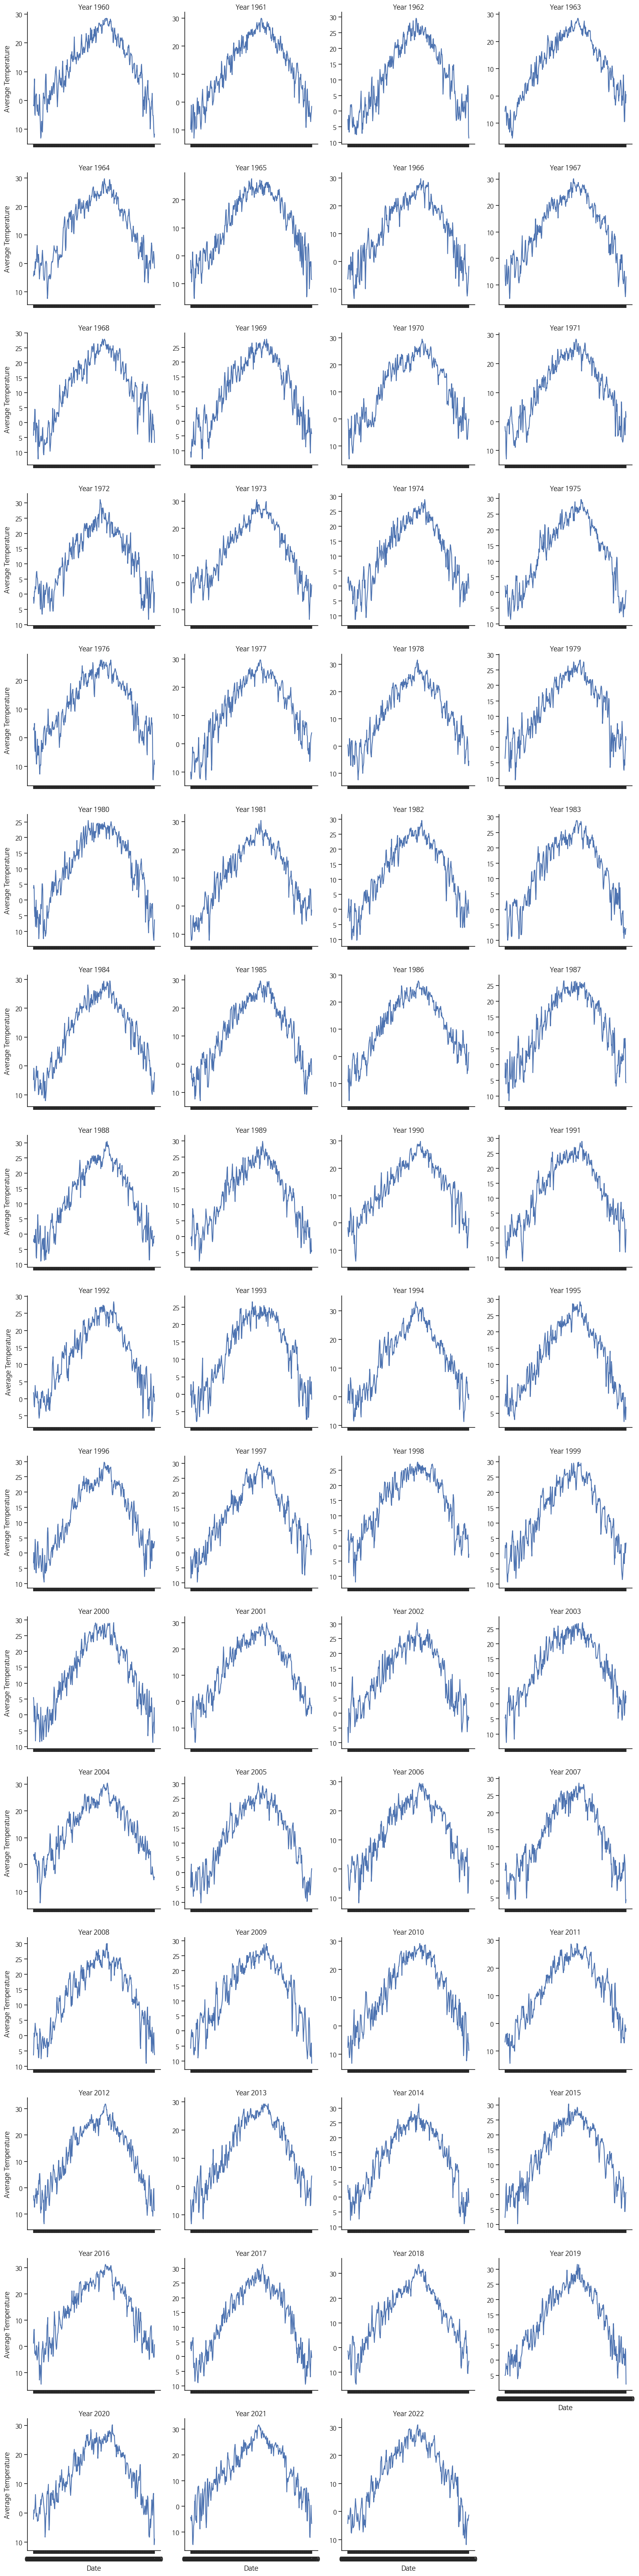

In [66]:
plt.rc('font', family='NanumBarunGothic')
# '일시' 열을 datetime 형식으로 변환
train_df['일시'] = pd.to_datetime(train_df['일시'])

# '년도' 정보를 추출하여 새로운 변수 생성
train_df['년도'] = train_df['일시'].dt.year

# '월일' 변수 생성
train_df['월일'] = train_df['일시'].dt.strftime('%m-%d')

# 년도별로 따로 그래프를 출력
g = sns.FacetGrid(train_df, col='년도', col_wrap=4, height=4, sharey=False)
g.map(sns.lineplot, '월일', '평균기온', sort=False)  # sort=False로 설정하여 월-일 순서를 유지
g.set_axis_labels('Date', 'Average Temperature')
g.set_titles('Year {col_name}')
plt.show()

# 계절 변수 생성

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


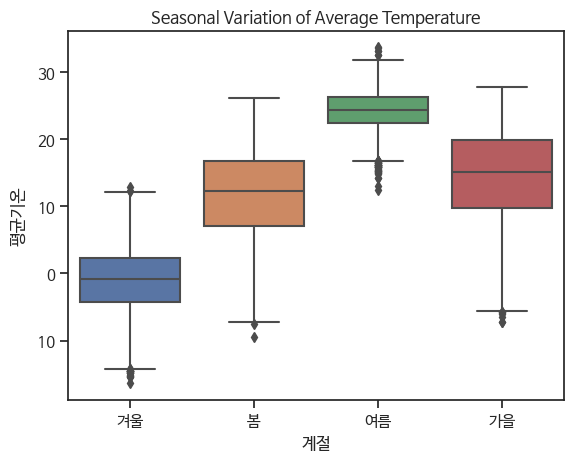

In [67]:
# '일시' 열을 datetime 형식으로 변환
train_df['일시'] = pd.to_datetime(train_df['일시'])

# '월' 정보를 추출하여 '계절' 변수 생성
train_df['월'] = train_df['일시'].dt.month
train_df['계절'] = train_df['월'].apply(lambda x: '봄' if 3 <= x <= 5 else ('여름' if 6 <= x <= 8 else ('가을' if 9 <= x <= 11 else '겨울')))

# '계절' 변수와 '평균기온' 간의 관계 시각화 또는 분석 수행
# 예를 들어, boxplot을 이용하여 각 계절의 평균기온 분포를 확인할 수 있습니다.
sns.boxplot(x='계절', y='평균기온', data=train_df)
plt.title('Seasonal Variation of Average Temperature')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


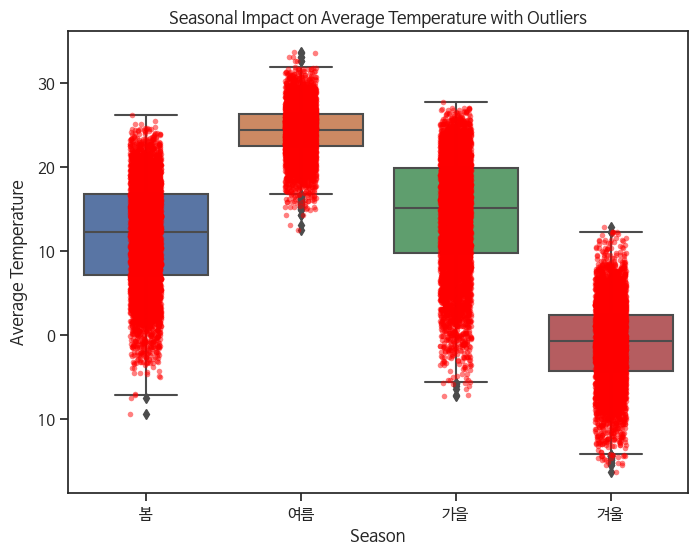

In [74]:
# 계절별 평균 기온 상자그림
plt.figure(figsize=(8, 6))
sns.boxplot(x='계절', y='평균기온', data=train_df, order=['봄', '여름', '가을', '겨울'])

# 이상치 표시
sns.stripplot(x='계절', y='평균기온', data=train_df, order=['봄', '여름', '가을', '겨울'], color='red', size=4, alpha=0.5)

plt.title('Seasonal Impact on Average Temperature with Outliers')
plt.xlabel('Season')
plt.ylabel('Average Temperature')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


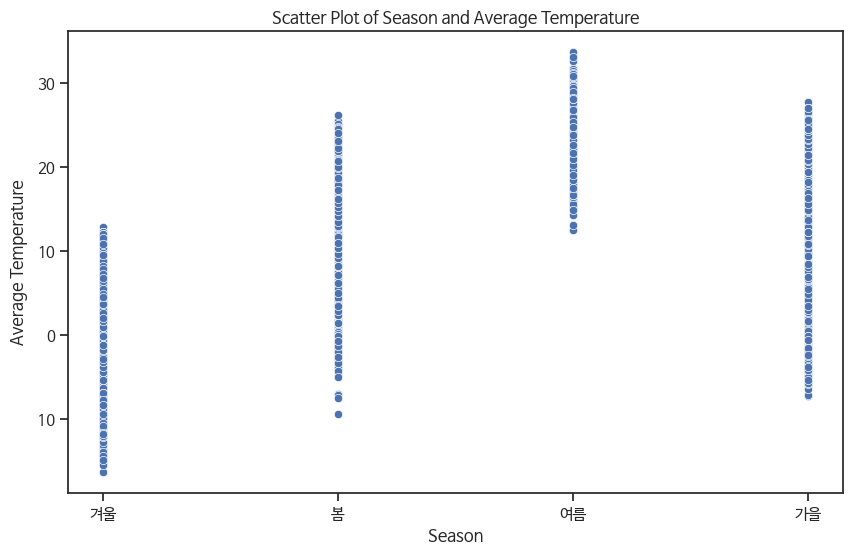

In [68]:
# '일시' 열을 datetime 형식으로 변환
train_df['일시'] = pd.to_datetime(train_df['일시'])

# '월일' 변수 생성
train_df['월일'] = train_df['일시'].dt.strftime('%m-%d')

# 계절별 산점도 출력
plt.figure(figsize=(10, 6))
sns.scatterplot(x='계절', y='평균기온', data=train_df)
plt.title('Scatter Plot of Season and Average Temperature')
plt.xlabel('Season')
plt.ylabel('Average Temperature')
plt.show()

계절 혹은 월에 따라서 평균기온이 달라질 수 있으므로 계절이나 월 변수를 추가하여 분석해볼 예정

# 강수유무 변수 생성

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


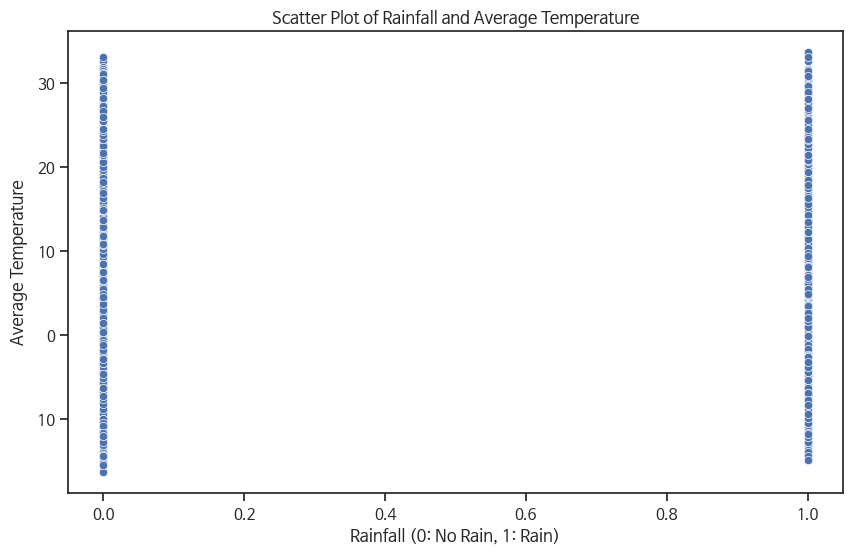

In [69]:
# '강수유무' 컬럼 생성
train_df['강수유무'] = (train_df['강수량'] > 0).astype(int)

# '강수유무'와 '평균기온' 간의 산점도 출력
plt.figure(figsize=(10, 6))
sns.scatterplot(x='강수유무', y='평균기온', data=train_df)
plt.title('Scatter Plot of Rainfall and Average Temperature')
plt.xlabel('Rainfall (0: No Rain, 1: Rain)')
plt.ylabel('Average Temperature')
plt.show()

강수유무는 평균기온에 영향을 끼치지 않는 것으로 판단.

# 일사합과 일조합을 이용한 파생변수 아이디어

일사합과 일조합 비율: 일사합 대비 일조합의 비율을 구해 새로운 변수를 생성할 수 있음. 이 비율은 태양이 떠 있는 동안 받은 일사 에너지의 일부를 나타내며, 이것이 평균기온에 어떤 영향을 미치는지 확인할 수 있음.

일사합과 일조합 합계: 일사합과 일조합의 합계를 새로운 변수로 생성할 수 있음. 이는 주어진 기간 동안 받은 총 태양 에너지 양을 나타내며, 평균기온에 영향을 줄 수 있습니다.

일사합과 일조합 차이: 일사합과 일조합의 차이를 나타내는 변수를 생성할 수 있음. 이 변수는 태양광이 떠 있는 동안에만 발생하는 일사 에너지 양과 일조합의 차이를 나타내며, 이것이 평균기온에 영향을 미치는지 확인할 수 있음.

In [70]:
# 일사합 대비 일조합 비율 변수 생성
train_df['일사일조비율'] = train_df['일사합'] / train_df['일조합']

# 일사합과 일조합 합계 변수 생성
train_df['일사일조합계'] = train_df['일사합'] + train_df['일조합']


# 일사합과 일조합 차이 변수 생성
train_df['일사일조차이'] = train_df['일사합'] - train_df['일조합']

/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
<ipython-input-71-98f5001cdf4f>:18: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


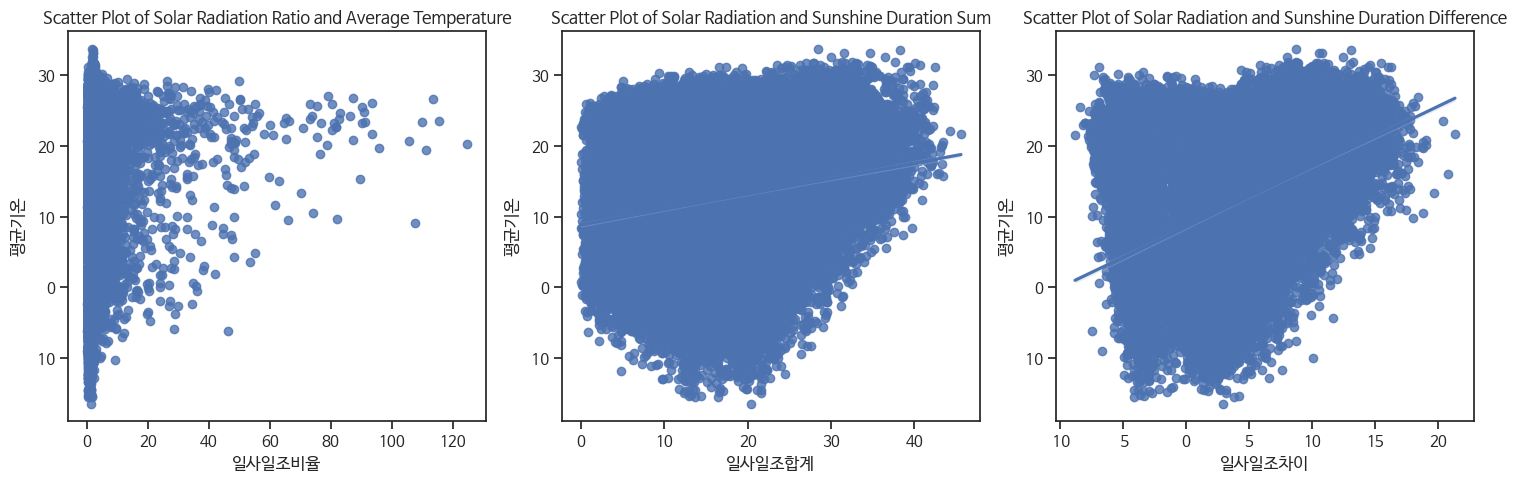

In [71]:
# 산점도 그래프 출력 (가로축 '일사일조비율', 세로축 '평균기온')
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.regplot(x='일사일조비율', y='평균기온', data=train_df)
plt.title('Scatter Plot of Solar Radiation Ratio and Average Temperature')

# 산점도 그래프 출력 (가로축 '일사일조합계', 세로축 '평균기온')
plt.subplot(1, 3, 2)
sns.regplot(x='일사일조합계', y='평균기온', data=train_df)
plt.title('Scatter Plot of Solar Radiation and Sunshine Duration Sum')

# 산점도 그래프 출력 (가로축 '일사일조차이', 세로축 '평균기온')
plt.subplot(1, 3, 3)
sns.regplot(x='일사일조차이', y='평균기온', data=train_df)
plt.title('Scatter Plot of Solar Radiation and Sunshine Duration Difference')

plt.tight_layout()
plt.show()


# 전처리

In [72]:
train_df

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,년도,월일,월,계절,강수유무,일사일조비율,일사일조합계,일사일조차이
0,1960-01-01,2.2,-5.2,7.4,0.4,68.3,1.7,6.7,4.81,28.1,-1.6,1960,01-01,1,겨울,1,0.717910,11.51,-1.89
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,4.81,28.1,-1.9,1960,01-02,1,겨울,1,inf,4.81,4.81
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,4.81,28.1,4.0,1960,01-03,1,겨울,0,inf,4.81,4.81
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,4.81,28.1,7.5,1960,01-04,1,겨울,0,1.850000,7.41,2.21
4,1960-01-05,1.3,-8.2,9.5,0.0,44.0,5.1,8.2,4.81,28.1,-4.6,1960,01-05,1,겨울,0,0.586585,13.01,-3.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,10.6,0.1,69.8,1.8,8.8,10.25,91.7,-2.6,2022,12-27,12,겨울,1,1.164773,19.05,1.45
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3,2022,12-28,12,겨울,1,1.248276,19.56,2.16
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9,2022,12-29,12,겨울,0,1.208889,19.88,1.88
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8,2022,12-30,12,겨울,0,1.372152,18.74,2.94


In [75]:
columns_to_keep = ['일시', '최고기온', '최저기온', '계절', '일사일조차이']
train_df = train_df[columns_to_keep]

In [76]:
train_df

,일시,최고기온,최저기온,계절,일사일조차이
0,1960-01-01,2.2,-5.2,겨울,-1.89
1,1960-01-02,1.2,-5.6,겨울,4.81
2,1960-01-03,8.7,-2.1,겨울,4.81
3,1960-01-04,10.8,1.2,겨울,2.21
4,1960-01-05,1.3,-8.2,겨울,-3.39
...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,겨울,1.45
23007,2022-12-28,0.1,-6.0,겨울,2.16
23008,2022-12-29,2.1,-7.8,겨울,1.88
23009,2022-12-30,2.3,-4.4,겨울,2.94


In [77]:
# CSV 파일로 저장
train_df.to_csv('train_data.csv', index=False)